In [25]:
import argparse
import sys
import matplotlib.pyplot as plt

import gym
from gym import wrappers, logger

In [11]:
class RandomAgent(object):
    """The world's simplest agent!"""
    def __init__(self, action_space):
        self.action_space = action_space

    def act(self, observation, reward, done):
        return self.action_space.sample()

In [12]:
def plot_cumulated(ep, reward, title="", file_name="error"):
    plt.figure(figsize=(10, 10))
    plt.plot(ep, reward, 'ko')
    plt.ylabel("Récompense cumulée")
    plt.xlabel("Avancement de l'apprentisage")
    plt.title(title)
    plt.savefig(f"src/img/{file_name}.png")
    plt.show()

In [21]:
def plot_reward(reward, title="", file_name="error", mean_size=500):
    list_e = []
    i = 0
    while i < len(reward):
        max_mean = i + mean_size
        if max_mean >= len(reward):
            max_mean = len(reward) - 1
        list_e.append(sum(reward[i:max_mean])/(max_mean - i))
        i += mean_size
    plt.figure(figsize=(10, 10))
    plt.plot(range(len(list_e)), list_e, 'k')
    plt.ylabel("Récompense cumulée")
    plt.xlabel("Avancement de l'apprentisage")
    plt.title(title)
    plt.savefig(f"src/img/{file_name}.png")
    plt.show()

In [27]:
args = "CartPole-v1"

# You can set the level to logger.DEBUG or logger.WARN if you
# want to change the amount of output.
logger.set_level(logger.INFO)

env = gym.make(args)

# You provide the directory to write to (can be an existing
# directory, including one with existing data -- all monitor files
# will be namespaced). You can also dump to a tempdir if you'd
# like: tempfile.mkdtemp().
outdir = '/tmp/random-agent-results'
env = wrappers.Monitor(env, directory=outdir, force=True)
env.seed(0)
agent = RandomAgent(env.action_space)

episode_count = 1000
reward = 0
done = False

rewards = []

c_rewards = []
c_int = []

INFO: Making new env: CartPole-v1
INFO: Clearing 22 monitor files from previous run (because force=True was provided)


INFO: Starting new video recorder writing to /tmp/random-agent-results/openaigym.video.4.20539.video000000.mp4


INFO: Starting new video recorder writing to /tmp/random-agent-results/openaigym.video.4.20539.video000001.mp4


INFO: Starting new video recorder writing to /tmp/random-agent-results/openaigym.video.4.20539.video000008.mp4


INFO: Starting new video recorder writing to /tmp/random-agent-results/openaigym.video.4.20539.video000027.mp4


INFO: Starting new video recorder writing to /tmp/random-agent-results/openaigym.video.4.20539.video000064.mp4


INFO: Starting new video recorder writing to /tmp/random-agent-results/openaigym.video.4.20539.video000125.mp4


INFO: Starting new video recorder writing to /tmp/random-agent-results/openaigym.video.4.20539.video000216.mp4


INFO: Starting new video recorder writing to /tmp/random-agent-results/openaigym.video.4.20539.video000343.mp4


INFO: Starting new video recorder writing to /tmp/random-agent-results/openaigym.video.4.20539.video000512.mp4


INFO: Starting new video recorder writing to /tmp/random-agent-results/openaigym.video.4.20539.video000729.mp4


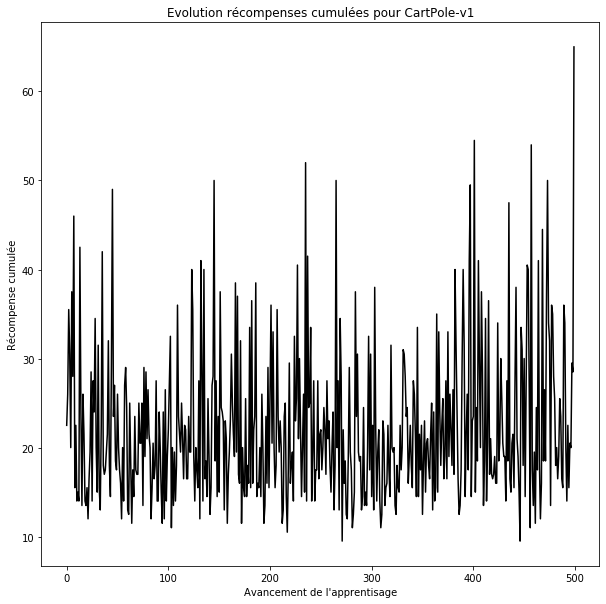

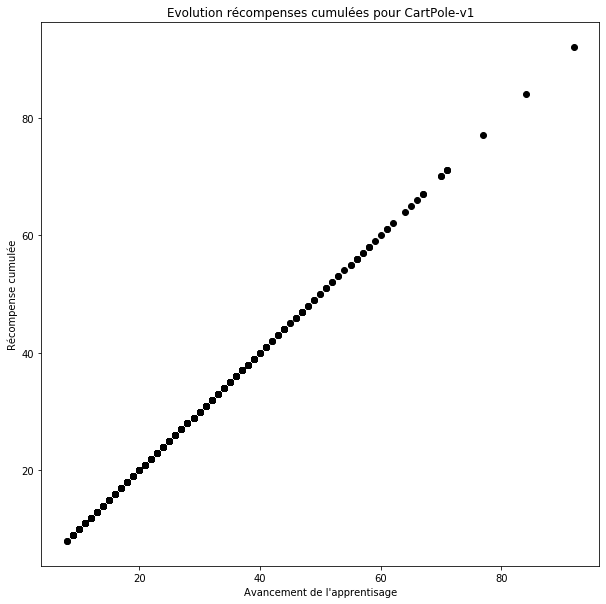

INFO: Finished writing results. You can upload them to the scoreboard via gym.upload('/tmp/random-agent-results')


In [28]:
for i in range(episode_count):
    ob = env.reset()
    rewardSum = 0
    steps = 0
    while True:
        action = agent.act(ob, reward, done)
        ob, reward, done, _ = env.step(action)
        rewardSum += reward
        steps += 1
        if done:
            rewards.append(rewardSum)
            c_rewards.append(rewardSum)
            c_int.append(steps)
            break
        # Note there's no env.render() here. But the environment still can open window and
        # render if asked by env.monitor: it calls env.render('rgb_array') to record video.
        # Video is not recorded every episode, see capped_cubic_video_schedule for details.

# Close the env and write monitor result info to disk
plot_reward(rewards, f"Evolution récompenses cumulées pour {args}", f"env_{args}_random", mean_size=2)
plot_cumulated(c_int, c_rewards, f"Evolution récompenses cumulées pour {args}", f"env_{args}_random_cumu")
env.close()
